In [10]:
import pandas as pd 

# Pandas Data-Structures

# Single-dimentional data structure       
#     < Series Object > 

s1 = pd.Series([10,20,30,40,50])
# print(s1)
    # 0    10
    # 1    20
    # 2    30
    # 3    40
    # 4    50
s1 = pd.Series([10,20,30,40,50], index=['a','b','c','d','e'])
# print(s1)  
    # a    10
    # b    20
    # c    30
    # d    40
    # e    50

sd1 = pd.Series({'a':10,'b':20,'c':30})  # if no index given, key will be the default index
# print(sd1)
    # a    10
    # b    20
    # c    30

    
    
#  Multi-dimentional data structure

#                                    head()
#
#  shape()        < DataFrame Object >         describe()
#
#                                    tail()


student = {"student_name":['Bob', 'Sam', 'Julia', 'Charles'], "Sstudent_marks":[83,13,99,47]}
                     # 'key' becomes column name,  'values' become row values
df1 = pd.DataFrame(student)
    #     student_name    Sstudent_marks
    # 0       Bob                       83
    # 1       Sam                       13
    # 2       Julia                     99
    # 3       Charles                47
    


In [28]:
import pandas as pd 

df = pd.read_csv("data/sales-funnel.csv")
# df.head()
# df.columns
# df.index
# df.values
# type(df)
# df.shape  # df.shape[0]     df.shape[1]
# df.info()

df.iloc[0:3,0:2]   # index location [rows, columns]
df1 = df.iloc[9:13,2:4]
df1

df.loc[0:3, ('Rep', 'Manager')]

df['Price'] > 40000
df[ df['Price'] > 40000 ]
df[ (df['Price'] > 40000) & (df['Rep'] == 'Wendy Yule') ]



,Account,Name,Rep,Manager,Product,Quantity,Price,Status
14,688981,Keeling LLC,Wendy Yule,Fred Anderson,CPU,5,100000,won
15,729833,Koepp Ltd,Wendy Yule,Fred Anderson,CPU,2,65000,declined


In [23]:
import pandas as pd
# !pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install
# !jupyter notebook --version
# !pip install --upgrade ipython
# !jupyter --path
# !pip freeze

df_flights = pd.read_csv('https://raw.githubusercontent.com/ismayc/pnwflights14/master/data/flights.csv')
# df_flights.to_csv('datax/flights.txt')
# df_flights.head()
# print(df_flights.info())

# df_flights.boxplot('dep_time','origin',rot = 30,figsize=(5,6))

cat_df_flights = df_flights.select_dtypes(include=['object']).copy()
cat_df_flights.head()

#total number of missing values in the DataFrame
print(cat_df_flights.isnull().values.sum())
#column-wise distribution of null values
print(cat_df_flights.isnull().sum())

print(cat_df_flights['carrier'].value_counts())
print(cat_df_flights['carrier'].value_counts().count())


# %matplotlib inline
# import seaborn as sns
# import matplotlib.pyplot as plt

# # bar chart
# carrier_count = cat_df_flights['carrier'].value_counts()
# sns.set(style="darkgrid")
# sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
# plt.title('Frequency Distribution of Carriers')
# plt.ylabel('Number of Occurrences', fontsize=12)
# plt.xlabel('Carrier', fontsize=12)
# plt.show()

# # pie chart
# labels = cat_df_flights['carrier'].astype('category').cat.categories.tolist()
# counts = cat_df_flights['carrier'].value_counts()
# sizes = [counts[var_cat] for var_cat in labels]
# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
# ax1.axis('equal')
# plt.show()


# < Encoding Categorical Data >

#-Replacing values                 ( By default the categories are ordered alphabetically )
                                                    # typecasting by using .astype() method on your columns
labels = cat_df_flights['carrier'].astype('category').cat.categories.tolist()
replace_map_comp = {'carrier' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
# print(replace_map_comp)
cat_df_flights_repl = cat_df_flights.copy()
cat_df_flights_repl.replace(replace_map_comp, inplace=True)
print(cat_df_flights_repl.head())


cat_df_flights_lc = cat_df_flights.copy()
cat_df_flights_lc['carrier'] = cat_df_flights_lc['carrier'].astype('category')
cat_df_flights_lc['origin'] = cat_df_flights_lc['origin'].astype('category')

# import time
# %timeit cat_df_flights.groupby(['origin','carrier']).count() #DataFrame with object dtype columns

# %timeit cat_df_flights_lc.groupby(['origin','carrier']).count() #DataFrame with category dtype columns

#-Encoding labels
cat_df_flights_lc['carrier'] = cat_df_flights_lc['carrier'].cat.codes
cat_df_flights_lc.head() #alphabetically labeled from 0 to 10

import numpy as np

cat_df_flights_specific = cat_df_flights.copy()
cat_df_flights_specific['US_code'] = np.where(cat_df_flights_specific['carrier'].str.contains('US'), 1, 0)

cat_df_flights_specific.head()



#-One-Hot encoding


#-Binary encoding

#-Backward difference encoding

#-Miscellaneous features


248
carrier      0
tailnum    248
origin       0
dest         0
dtype: int64
AS    62460
WN    23355
OO    18710
DL    16716
UA    16671
AA     7586
US     5946
B6     3540
VX     3272
F9     2698
HA     1095
Name: carrier, dtype: int64
11
   carrier tailnum origin dest
0        2  N508AS    PDX  ANC
1        9  N195UW    SEA  CLT
2        8  N37422    PDX  IAH
3        9  N547UW    PDX  CLT
4        2  N762AS    SEA  ANC


,carrier,tailnum,origin,dest,US_code
0,AS,N508AS,PDX,ANC,0
1,US,N195UW,SEA,CLT,1
2,UA,N37422,PDX,IAH,0
3,US,N547UW,PDX,CLT,1
4,AS,N762AS,SEA,ANC,0


In [3]:
# Tidy data

import pandas as pd

pew = pd.read_csv('data/pew.csv')
pew.head()

pew_long = pd.melt(pew, id_vars='religion')
pew_long.head()

billboard = pd.read_csv('data/billboard.csv')
billboard.head()

billboard_melt = pd.melt(
    billboard,
    id_vars=['year', 'artist', 'track', 'time', 'date.entered'],
    var_name='week',
    value_name='rating'
)
billboard_melt.tail()

# drop_thresh = billboard.shape[0]*0.9
# df_n = billboard.dropna(thresh=drop_thresh, how='all', axis='columns').copy()
# df_n.shape

# weather = pd.read_csv('https://github.com/chendaniely/pandas_for_everyone/blob/master/data/weather.csv')
weather = pd.read_csv('data/weather.csv')
weather.head()

weather_long = pd.melt(
    weather,
    id_vars=['id', 'year', 'month', 'element'],
    var_name='day',
    value_name='temp'
)
weather_long.head()

weather_tidy = weather_long.pivot_table(
    index=['id', 'year', 'month', 'day'],
    columns='element',
    values='temp'
)
weather_tidy.head(6)
weather_tidy.reset_index()



element,id,year,month,day,tmax,tmin
0,MX17004,2010,1,d30,27.8,14.5
1,MX17004,2010,2,d11,29.7,13.4
2,MX17004,2010,2,d2,27.3,14.4
3,MX17004,2010,2,d23,29.9,10.7
4,MX17004,2010,2,d3,24.1,14.4
5,MX17004,2010,3,d10,34.5,16.8
6,MX17004,2010,3,d16,31.1,17.6
7,MX17004,2010,3,d5,32.1,14.2
8,MX17004,2010,4,d27,36.3,16.7
9,MX17004,2010,5,d27,33.2,18.2


In [1]:
import pandas as pd
import numpy as np

# pd.show_versions()
df = pd.read_csv("data/sales-funnel.csv")
df.head()
df.columns
df.index
df.values
type(df)
df.shape  # df.shape[0]     df.shape[1]
# df.info()

name_df = df['Name']
type(name_df)

# .loc  - Access a group of rows and columns by label(s) or a boolean array. 
# .iloc  - Purely integer-location based indexing for selection by position.
subset_col = df[['Name', 'Price']]   
subset_col.head()

subset_r_c = df.loc[ : , ['Name', 'Status', 'Price']]
subset_r_c.head()
subset_row_only = df.loc[[2, 0, 1]]
subset_row_only.head()

df.iloc[2]       # positional indexing

df["Status"] = df["Status"].astype("category")
df["Status"].cat.set_categories(["won","pending","presented","declined"],inplace=True)
# df["Status"]

# filtering
df.loc[df['Name'] == 'Trantow-Barrows', ['Name','Product', 'Quantity','Status']]
df.loc[ (df['Name'] == 'Trantow-Barrows') & (df['Quantity'] > 1), ['Name','Product', 'Quantity','Status']]

# df.head()



INSTALLED VERSIONS
------------------
commit: None
python: 3.7.3.final.0
python-bits: 64
OS: Windows
OS-release: 10
machine: AMD64
processor: Intel64 Family 6 Model 37 Stepping 2, GenuineIntel
byteorder: little
LC_ALL: None
LANG: None
LOCALE: None.None

pandas: 0.24.2
pytest: 4.3.1
pip: 19.0.3
setuptools: 40.8.0
Cython: 0.29.6
numpy: 1.16.2
scipy: 1.2.1
pyarrow: None
xarray: None
IPython: 7.4.0
sphinx: 1.8.5
patsy: 0.5.1
dateutil: 2.8.0
pytz: 2018.9
blosc: None
bottleneck: 1.2.1
tables: 3.5.1
numexpr: 2.6.9
feather: None
matplotlib: 3.0.3
openpyxl: 2.6.1
xlrd: 1.2.0
xlwt: 1.3.0
xlsxwriter: 1.1.5
lxml.etree: 4.3.2
bs4: 4.7.1
html5lib: 1.0.1
sqlalchemy: 1.3.1
pymysql: 0.9.3
psycopg2: None
jinja2: 2.10
s3fs: None
fastparquet: None
pandas_gbq: None
pandas_datareader: None
gcsfs: None


,Name,Product,Quantity,Status
2,Trantow-Barrows,Maintenance,2,pending


In [95]:
import pandas as pd
from pandas.api.types import CategoricalDtype

# low_memory=False parameter in order to surpress this warning:
df_raw = pd.read_csv('data/OP_DTL_RSRCH_PGYR2013_P06282019.csv', low_memory=False)
# df.shape[0]  # gives number of row count
# df.shape[1]  # gives number of column count

#quickly drop all the columns where at least 90% of the data is empty. might be handy for others as well.
drop_thresh = df_raw.shape[0]*0.9
df = df_raw.dropna(thresh=drop_thresh, how='all', axis='columns').copy()
# df.head()

#---------------------------------
from dateutil import parser
import datetime

def str_to_dt2(s):
    try:
        date_object = parser.parse(str(s))
    except ValueError:
        date_object = datetime.datetime(1970,1,1)
    except:
        date_object = datetime.datetime(1970,1,1)
    return date_object

df['Date_of_Payment'] = df.Date_of_Payment.apply(str_to_dt2)
df.head()

#---------------------------------


,Change_Type,Covered_Recipient_Type,Recipient_Primary_Business_Street_Address_Line1,Recipient_City,Recipient_State,Recipient_Zip_Code,Recipient_Country,Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name,...,Total_Amount_of_Payment_USDollars,Date_of_Payment,Form_of_Payment_or_Transfer_of_Value,Preclinical_Research_Indicator,Delay_in_Publication_Indicator,Name_of_Study,Dispute_Status_for_Publication,Record_ID,Program_Year,Payment_Publication_Date
0,UNCHANGED,Covered Recipient Physician,PO BOX 365067,SAN JUAN,PR,00936,United States,ViiV Healthcare Company,100000005550,ViiV Healthcare Company,...,91.67,2013-09-20,Cash or cash equivalent,No,No,A Phase IIIb randomized openlabel study of the...,No,106200494,2013,06/28/2019
1,UNCHANGED,Covered Recipient Physician,4290 Glendale Milford,Cincinnati,OH,45242,United States,Merck Sharp & Dohme Corporation,100000000053,Merck Sharp & Dohme Corporation,...,1216.53,2013-10-08,In-kind items and services,No,No,"A Phase II, Randomized, Active Comparator-Cont...",No,281346588,2013,06/28/2019
2,UNCHANGED,Covered Recipient Physician,100 UCLA MEDICAL PLZ STE 510,LOS ANGELES,CA,90095,United States,Merck Sharp & Dohme Corporation,100000000053,Merck Sharp & Dohme Corporation,...,15.22,2013-09-06,In-kind items and services,No,No,"A Phase III Randomized, Placebo-Controlled, Cl...",No,281403760,2013,06/28/2019
3,UNCHANGED,Covered Recipient Physician,340 GOLDEN SHORE 400,LONG BEACH,CA,90802,United States,Merck Sharp & Dohme Corporation,100000000053,Merck Sharp & Dohme Corporation,...,412.00,2013-11-08,In-kind items and services,No,No,A Double BlindPlacebo Controlled Trial of Asen...,No,106069910,2013,06/28/2019
4,UNCHANGED,Covered Recipient Teaching Hospital,111 E 210th St,Bronx,NY,10467,United States,Pfizer Inc.,100000000286,Pfizer Inc.,...,180.92,2013-11-12,In-kind items and services,No,No,ARCHER 1042 A PHASE 2 STUDY OF DACOMITINIB IN...,No,207498022,2013,06/28/2019


In [63]:
# keep continued from the above cell 

# df_raw.info()
# df.info()

# function to create a dataframe showing all the unique values in a column.
unique_counts = pd.DataFrame.from_records([(col, df[col].nunique()) for col in df.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
# unique_counts

cols_to_exclude = ['Program_Year', 'Date_of_Payment', 'Payment_Publication_Date']
for col in df.columns:
    if df[col].nunique() < 600 and col not in cols_to_exclude:
        df[col] = df[col].astype('category')

# df.info()

# df.groupby('Form_of_Payment_or_Transfer_of_Value')['Total_Amount_of_Payment_USDollars'].sum().to_frame()
df.groupby('Covered_Recipient_Type')['Total_Amount_of_Payment_USDollars'].sum().to_frame()

import time

# %timeit df_raw.groupby('Covered_Recipient_Type')['Total_Amount_of_Payment_USDollars'].sum().to_frame()

# %timeit df.groupby('Covered_Recipient_Type')['Total_Amount_of_Payment_USDollars'].sum().to_frame()




# Let’s build a simple dataframe with one ordered categorical variable that represents 
# the status of the customer. 
# Here, highlight some potential subtle errors when dealing with categorical values.

sales_1 = [{'account': 'Jones LLC', 'Status': 'Gold', 'Jan': 150, 'Feb': 200, 'Mar': 140},
         {'account': 'Alpha Co', 'Status': 'Gold', 'Jan': 200, 'Feb': 210, 'Mar': 215},
         {'account': 'Blue Inc',  'Status': 'Silver', 'Jan': 50,  'Feb': 90,  'Mar': 95 }]
df_1 = pd.DataFrame(sales_1)
# print(df_1)
status_type = CategoricalDtype(categories=['Silver', 'Gold'], ordered=True)
df_1['Status'] = df_1['Status'].astype(status_type)
df_1

sales_2 = [{'account': 'Smith Co', 'Status': 'Silver', 'Jan': 100, 'Feb': 100, 'Mar': 70},
         {'account': 'Bingo', 'Status': 'Bronze', 'Jan': 310, 'Feb': 65, 'Mar': 80}]
df_2 = pd.DataFrame(sales_2)
df_2['Status'] = df_2['Status'].astype(status_type)
df_2



12.1 ms ± 378 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [26]:
# pd.pivot_table

import pandas as pd
import numpy as np
# pd.__version__
# pd.show_versions()

df = pd.read_csv("data/sales-funnel.csv")

# For convenience sake, let’s define the status column as a category and set the order we want to view.
df['Status'] = df['Status'].astype('category')
df['Status'].cat.set_categories(['won', 'pending', 'presented', 'declined'], inplace=True)
df.head()

# pd.pivot_table(df,index=['Name'])
# pd.pivot_table(df,index=["Name","Rep","Manager"])
pd.pivot_table(df,index=["Manager","Rep"])
pd.pivot_table(df,index=["Manager","Rep"],values=["Price"])
pd.pivot_table(df,index=["Manager","Rep"],values=["Price"],aggfunc=np.sum)

Price
Manager       Rep                  
Debra Henley  Craig Booker    80000
              Daniel Hilton  115000
              John Smith      40000
Fred Anderson Cedric Moss    110000
              Wendy Yule     177000

In [ ]:
Comparing "map", "applymap" and "apply": Context Matters
    
First major difference: DEFINITION

    map is defined on Series ONLY
    applymap is defined on DataFrames ONLY
    apply is defined on BOTH

Second major difference: INPUT ARGUMENT

    map accepts dicts, Series, or callable
    applymap and apply accept callables only
    
Third major difference: BEHAVIOR

    map is elementwise for Series
    applymap is elementwise for DataFrames
    apply also works elementwise but is suited to more complex operations and aggregation. 
        The behaviour and return value depends on the function.

Fourth major difference (the most important one): USE CASE

    map is meant for mapping values from one domain to another, 
        so is optimised for performance (e.g., df['A'].map({1:'a', 2:'b', 3:'c'}))
    applymap is good for elementwise transformations across multiple rows/columns 
        (e.g., df[['A', 'B', 'C']].applymap(str.strip))
    apply is for applying any function that cannot be vectorised 
        (e.g., df['sentences'].apply(nltk.sent_tokenize))
        

<Footnotes>

map when passed a dictionary/Series will map elements based on the keys in that dictionary/Series. 
        Missing values will be recorded as NaN in the output.
applymap in more recent versions has been optimised for some operations. 
        You will find applymap slightly faster than apply in some cases. 
        My suggestion is to test them both and use whatever works better.

map is optimised for elementwise mappings and transformation. 
        Operations that involve dictionaries or Series will enable pandas to use 
        faster code paths for better performance.

Series.apply returns a scalar for aggregating operations, Series otherwise. 

Similarly for DataFrame.apply. 
    Note that apply also has fastpaths when called with certain NumPy functions such as mean, sum, etc.
    
    

In [130]:
import numpy as np
import pandas as pd

s = pd.Series(['fox', 'cow', np.nan, 'dog'])
print(s, '\n')

#- map accepts a dict or a Series. 
#  Values that are not found in the dict are converted to NaN, unless the dict has a default value 
s2 = s.map({'fox': 'cub', 'cow': 'calf'})
print(s2, '\n')

#It also accepts a function:
s3 = s.map('I am a {}'.format)
print(s3, '\n')

s4 = s.map('I am a {}'.format, na_action='ignore')
print(s4, '\n')


0    fox
1    cow
2    NaN
3    dog
dtype: object 

0     cub
1    calf
2     NaN
3     NaN
dtype: object 

0    I am a fox
1    I am a cow
2    I am a nan
3    I am a dog
dtype: object 

0    I am a fox
1    I am a cow
2           NaN
3    I am a dog
dtype: object 



In [1]:
import pandas as pd
df_flights = pd.read_csv('data/flights.csv')

df_flights.head(4)
# dummy_df_age = pd.DataFrame({'age': ['0-20', '20-40', '40-60','60-80']})
# dummy_df_age.head()


,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2014,1,1,1.0,96.0,235.0,70.0,AS,N508AS,145,PDX,ANC,194.0,1542,0.0,1.0
1,2014,1,1,4.0,-6.0,738.0,-23.0,US,N195UW,1830,SEA,CLT,252.0,2279,0.0,4.0
2,2014,1,1,8.0,13.0,548.0,-4.0,UA,N37422,1609,PDX,IAH,201.0,1825,0.0,8.0
3,2014,1,1,28.0,-2.0,800.0,-23.0,US,N547UW,466,PDX,CLT,251.0,2282,0.0,28.0


In [132]:
import pandas as pd
import numpy as np
import copy
# !cat data/flights.csv


# df_flights = pd.read_csv('https://raw.githubusercontent.com/ismayc/pnwflights14/master/data/flights.csv')
df_flights = pd.read_csv('data/flights.csv')

# df_flights.head()
# df_flights.info()

# df_flights.boxplot('dep_time','origin',rot = 30,figsize=(5,6))
cat_df_flights = df_flights.select_dtypes(include=['object']).copy()
cat_df_flights.head()

#total number of missing values
print("'total number of missing values'\n", cat_df_flights.isnull().values.sum(), '\n')


#column-wise null values:
print("'column-wise null values'\n", cat_df_flights.isnull().sum(), '\n')


#fillna() is handy for replacing null values as NAN.
cat_df_flights = cat_df_flights.fillna(cat_df_flights['tailnum'].value_counts().index[0])
print("'after fillna()'\n", cat_df_flights.isnull().values.sum(), '\n')

#categorical features
print("'count of categories'\n", cat_df_flights['carrier'].value_counts(),'\n')
print("'count of distinct categories'\n", cat_df_flights['carrier'].value_counts().count(),'\n')
print("'count of categories'\n", cat_df_flights['origin'].value_counts(),'\n')

# #1. Indexing

# df_flights.loc[3, 'tailnum']
# df_flights.loc[:, 'tailnum'].head()
# df_flights.iloc[1:6, 1:6]

# df_flights.query('dep_time > 40 and distance < 2500 ').head()


# Visual exploration
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart
# carrier_count = cat_df_flights['carrier'].value_counts()
# sns.set(style="darkgrid")
#     # sns.barplot(data, x, y, kwargs)
# sns.barplot(carrier_count.index, carrier_count.values, alpha=0.7)
# plt.title('Frequency Distribution of Carriers')
# plt.ylabel('Number of Occurrences', fontsize=12)
# plt.xlabel('Carrier', fontsize=12)
# plt.show()

# Pie chart
# labels = cat_df_flights['carrier'].astype('category').cat.categories.tolist()
# counts = cat_df_flights['carrier'].value_counts()
# sizes = [counts[var_cat] for var_cat in labels]
# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
# ax1.axis('equal')
# plt.show()

# Encoding Categorical Data
# - encode the categorical features to numeric quantities. 

#1. Replace Values
# -- hard coded dictionary -- is easy for small number of categories --
# replace_map = {'carrier': {'AA': 1, 'AS': 2, 'B6': 3, 'DL': 4,
#                                   'F9': 5, 'HA': 6, 'OO': 7 , 'UA': 8 , 'US': 9,'VX': 10,'WN': 11}}

# -- dictionary comprehensions -- for big number of categories 
labels = cat_df_flights['carrier'].astype('category').cat.categories.tolist()
replace_map_comp = {'carrier' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
# print(replace_map_comp)

cat_df_flights_replace = cat_df_flights.copy()
cat_df_flights_replace.replace(replace_map_comp, inplace=True)

print(cat_df_flights_replace.head(),'\n')

#-- typecasting by using .astype() method on your columns.
# " category dtype" makes the operations on such columns much faster than the "object dtype".
cat_df_flights_lc = cat_df_flights.copy()
cat_df_flights_lc['carrier'] = cat_df_flights_lc['carrier'].astype('category')
cat_df_flights_lc['origin'] = cat_df_flights_lc['origin'].astype('category')                                                              

print(cat_df_flights_lc.dtypes,'\n')

import time
#-- calculate the number of flights for each carrier from each origin places.
cat_df_flights.groupby(['origin','carrier']).count()
# %timeit cat_df_flights.groupby(['origin','carrier']).count() #DataFrame with object dtype columns
cat_df_flights.groupby(['origin','carrier']).count()
# %timeit cat_df_flights_lc.groupby(['origin','carrier']).count() #DataFrame with category dtype columns



# Label Encoding
cat_df_flights_lc.head()
cat_df_flights_lc['carrier'] = cat_df_flights_lc['carrier'].cat.codes
cat_df_flights_lc.head()

#- encode all the US carrier flights to value 1 and other carriers to value 0. 
cat_df_flights_specific = cat_df_flights.copy()
cat_df_flights_specific['US_code'] = np.where(cat_df_flights_specific['carrier'].str.contains('US'), 1, 0)

cat_df_flights_specific.head()

#- create dummy DataFrame which has just one feature "age" with ranges specified.
dummy_df_age = pd.DataFrame({'age': ['0-20', '20-40', '40-60','60-80']})

# Series.map()
print(*dummy_df_age['age'])
dummy_df_age['start'], dummy_df_age['end'] = zip(*dummy_df_age['age'].map(lambda x: x.split('-')))

dummy_df_age.head()


# Seriese( or DataFrame ).apply()
dummy_df_age = pd.DataFrame({'age': ['0-20', '20-40', '40-60','60-80']})

def split_mean(x):
    split_list = x.split('-')
    mean = (float(split_list[0])+float(split_list[1]))/2
    return mean

dummy_df_age['age_mean'] = dummy_df_age['age'].apply(lambda x: split_mean(x))

dummy_df_age.head()


'total number of missing values'
 248 

'column-wise null values'
 carrier      0
tailnum    248
origin       0
dest         0
dtype: int64 

'after fillna()'
 0 

'count of categories'
 AS    62460
WN    23355
OO    18710
DL    16716
UA    16671
AA     7586
US     5946
B6     3540
VX     3272
F9     2698
HA     1095
Name: carrier, dtype: int64 

'count of distinct categories'
 11 

'count of categories'
 SEA    108714
PDX     53335
Name: origin, dtype: int64 

   carrier tailnum origin dest
0        2  N508AS    PDX  ANC
1        9  N195UW    SEA  CLT
2        8  N37422    PDX  IAH
3        9  N547UW    PDX  CLT
4        2  N762AS    SEA  ANC 

carrier    category
tailnum      object
origin     category
dest         object
dtype: object 

0-20 20-40 40-60 60-80


,age,age_mean
0,0-20,10.0
1,20-40,30.0
2,40-60,50.0
3,60-80,70.0


In [ ]:
Pandas dtype       Python type        NumPy type                        Usage

object                     str                         string_, unicode_              Text
int64                      int                         int_, int8, int16, int32,     Integer numbers
                                                              int64, uint8, uint16, 
                                                              uint32, uint64
float64                  float                       float_, float16, float32,     Floating point numbers
                                                              float64
bool                       bool                       bool_                                    True/False values
datetime64          NA                         datetime64[ns]                   Date and time values
timedelta[ns]      NA                         NA                                          Differences between two datetimes
category               NA                          NA                                         Finite list of text values

Categorical data example, t-shirt, 
it could have categorical variables such as:

    Size (X-Small, Small, Medium, Large, X-Large)
    Color (Red, Black, White)
    Style (Short sleeve, long sleeve)
    Material (Cotton, Polyester)
    
Attributes such as cost, price, quantity are typically integers or floats.


In [21]:
import numpy as np 
import pandas as pd 
  
# Categorical using dtype 
c = pd.Series(["a","a","a", "b", "d", "a", "d","c"], dtype ="category") 
print ("\nCategorical without pandas.Categorical() : \n", c) 
  
  
c1 = pd.Categorical([1, 2, 3, 1, 2, 3, 3, 3]) 
print ("\n\nc1 : ", c1) 
  
c2 = pd.Categorical(['e', 'm', 'f', 'i', 'f', 'e', 'h', 'm' ]) 
print ("\nc2 : ", c2) 


Categorical without pandas.Categorical() : 
 0    a
1    a
2    a
3    b
4    d
5    a
6    d
7    c
dtype: category
Categories (4, object): [a, b, c, d]


c1 :  [1, 2, 3, 1, 2, 3, 3, 3]
Categories (3, int64): [1, 2, 3]

c2 :  [e, m, f, i, f, e, h, m]
Categories (5, object): [e, f, h, i, m]


In [17]:
import pandas as pd
!cat data/data.csv

df = pd.read_csv('data/data.csv', header=2, skiprows=[3, 4])
# df.info()

df = pd.read_csv('data/titanic.csv')
df.head()
%timeit df.groupby('Age')['Survived'].sum()

df['Age'] = df['Age'].astype('category')
%timeit df.groupby('Age')['Survived'].sum()

# Two easy ways to reduce DataFrame memory usage:
# 1. Only read in columns you need
# 2. Use 'category' data type with categorical data.
# df = pd.read _csv('data/data.csv', usecols=['col_one', 'col_two', 'col_three'], dtype={'col_three':'category'})


,,
,,
col_one,col_two,col_three
,,
,,
10,20,30
40,50,60
70,80,90
1.36 ms ± 1.31 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.2 ms ± 30.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


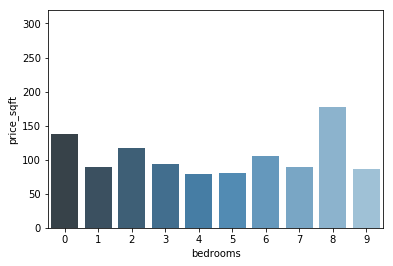

In [3]:
# First the 'pandas' library, a very powerful library
# used by data scientist and analysts to manipulate, preprocess data.
# Through pandas, you get acquainted with your data 
# by cleaning, transforming, and analyzing it.
#
# Seaborn is a library for making statistical graphics in Python. 
# It is built on top of matplotlib and closely integrated with pandas data structures.
import pandas as pd
import seaborn as sns

# Next we're going to import the data file. 
#   pd.read_csv   for csv files.
#  read_excel   for xls files. 
# This will import all your data and create a dataframe. 
# If an index is not specified it will insert an index starting at 0, 
# however you can adjust the index to start wherever you want or use a column name as an index
df = pd.read_excel('data.xls')

# Next you will notice that price prints in scientific notation (float64) so we have to convert it to (int64)
df['price']=df['price'].astype('int64')
df

# TRANSFORMATION #1:
# Let's view some statistics on this dataset.
df.describe()

# TRANSFORMATION #2:
# Now lets derive a calculated field called price per sq ft in excel and in pandas 
# and sort by the derived field in descending order
df['price_sqft'] = df['price']/df['sqft_lot']
df = df.sort_values(by=['price_sqft'], ascending=False)
df.head()

# TRANSFORMATION #3:
# Find the count of sales and mean price in each city by bedroom. 
# We will accomplish this by plotting a pivot table
dfpiv = pd.pivot_table(df,index=['city'], 
                      values=['price', 'price'], 
                      columns=['bedrooms'], 
                      aggfunc=['count','mean'], 
                      fill_value=0)
dfpiv.head()

# TRANSFORMATION #4:
# Now let's append the average 5 year appreciation rate by city 
# using a vlookup in excel and similar in pandas
df_appre = pd.read_excel('data.xls', sheet_name='city_AA')
results = df.merge(df_appre, on='city')
results.head()

results.loc[results['city']=='Medina'].head()


# TRANSFORMATION #5:
# Plot the average price per sqft by bedroom using a bar graph
graph = sns.barplot(x='bedrooms', y='price_sqft', data=results, palette='Blues_d', errwidth=0)


In [6]:
import pandas as pd

# The primary two components of pandas are the Series and DataFrame.
# Series = essentially a column,
# DataFrame = a multi-dimensional table made up of a collection of Series.

data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]
}

purchases = pd.DataFrame(data)
# print(purchases)

# Each (key, value) item in "data" corresponds to a column in the resulting DataFrame.

# The Index of this DataFrame was given to us on creation as the default numbers 0-3,
#  but we could also create our own when we initialize the DataFrame.

purchases = pd.DataFrame(data, index=['June', 'Robert', 'Lily', 'David'])
# print(purchases)

# So now we could locate a customer's order by using their name:
purchases.loc['June']


###### How to read in data #######

# df = pd.read_csv('data3.csv')
# df.set_index('Responder_id')
df = pd.read_csv('purchases.csv', index_col=0)
# print(df)

df = pd.read_json('purchases.json')
# print(df.head(2))
# print(df.tail(2))

df.info()

# .shape has no parentheses and returns a simple tuple of format (rows, columns)
df.shape

# append() will return a copy without affecting the original DataFrame. 
temp_df = df.append(df)
temp_df.shape
temp_df

# try dropping duplicates from original df:
temp_df.drop_duplicates(inplace=True, keep=False)
temp_df.shape

# how to print the column names of our dataset:
df.columns

# .rename() method to rename certain or all columns via a dict
temp_df.rename(columns={
        'aid': 'e_id', 
        'firstName': 'first_name'
    }, inplace=True)

temp_df.columns

# Instead of just renaming each column manually we can do a list comprehension:
temp_df.columns = [col.upper() for col in temp_df]
temp_df.columns

temp_df.isnull()


       apples  oranges
David       1        2
June        3        0
        apples  oranges
Lily         0        7
Robert       2        3
<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, David to Robert
Data columns (total 2 columns):
apples     4 non-null int64
oranges    4 non-null int64
dtypes: int64(2)
memory usage: 96.0+ bytes


,APPLES,ORANGES
David,False,False
June,False,False
Lily,False,False
Robert,False,False


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# CSVs don't have indexes like our DataFrames, 
# so all we need to do is just designate the index_col when reading

# df = pd.read_csv('Movie.csv', index_col=0)      # pd.read_json # pd.read_excel
df = pd.read_csv('Movie.csv', index_col="Title")
df.head()
df.tail(2)


# Reading data from a SQL database
# import sqlite3
# con = sqlite3.connect("database.db")
# df = pd.read_sql_query("SELECT * FROM purchases", con)

# Converting back to a CSV, JSON, or SQL
# df.to_csv('new_purchases.csv')
# df.to_json('new_purchases.json')
# df.to_sql('new_purchases', con)

temp_df = df.append(df)
# temp_df.shape
# temp_df.tail(2)

# temp_df = temp_df.drop_duplicates()
# temp_df.shape
temp_df.drop_duplicates(inplace=True, keep=False)
temp_df.shape

# df.info()
# df.shape                # outputs just a tuple of (rows, columns)
# df.dtypes
# df.isnull()
# df.isnull().sum()

df.rename(columns={
        'Runtime (Minutes)': 'Runtime', 
        'Revenue (Millions)': 'Revenue_millions'    }, inplace=True)
df.columns

df.columns = [col.lower() for col in df]
df.columns

df.isnull().sum()
# delete any row with at least a single null value, but it will return a new DataFrame 
# without altering the original one.
df.dropna()
df.isnull().sum()


revenue = df['revenue_millions']
revenue.head()
revenue_mean = revenue.mean()
revenue_mean
revenue.fillna(revenue_mean, inplace=True)
df.isnull().sum()

df.describe()
df['genre'].describe()
df['genre'].value_counts().head(20)

Action,Adventure,Sci-Fi       50
Drama                         48
Comedy,Drama,Romance          35
Comedy                        32
Drama,Romance                 31
Animation,Adventure,Comedy    27
Comedy,Drama                  27
Action,Adventure,Fantasy      27
Comedy,Romance                26
Crime,Drama,Thriller          24
Crime,Drama,Mystery           23
Action,Adventure,Drama        18
Action,Crime,Drama            17
Horror,Thriller               16
Drama,Thriller                15
Adventure,Family,Fantasy      14
Biography,Drama               14
Biography,Drama,History       14
Action,Adventure,Comedy       14
Action,Comedy,Crime           12
Name: genre, dtype: int64

In [116]:
import pandas as pd
import numpy as np

# 1. Styling

# - Highlight all negative values in a dataframe.
def set_color(val):
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

df = pd.DataFrame(dict(col_1=[1.53, -2.5, 3.53],
                                             col_2=[-4.1, 5.9, 0])
                                   )
df.style.applymap(set_color)

# - Hide the index.
df.head().style.hide_index()

#- Add hovering effects.
df = pd.DataFrame(np.random.randn(5, 3))
df.style.set_table_styles(
    [{'selector': 'tr:hover',
      'props': [('background-color', 'yellow')]}]
)

#- More CSS styles. You can use CSS to change the appearance of the table.
df = pd.DataFrame(
                dict(departure=['SFO', 'SFO', 'LAX', 'LAX', 'JFK', 'SFO'],
                         arrival=['ORD', 'DFW', 'DFW', 'ATL', 'ATL', 'ORD'],
                         airlines=['Delta','JetBlue','Delta','AA','SouthWest', 'Delta']),
                     columns=['airlines', 'departure','arrival'])

df.style.set_table_styles(
            [{'selector': 'tr:nth-of-type(odd)', 'props': [('background', '#eee')]}, 
             {'selector': 'tr:nth-of-type(even)', 'props': [('background', 'white')]},
             {'selector': 'th',   'props': [('background', '#606060'), 
                                                            ('color', 'white'),
                                                            ('font-family', 'verdana')]},
             {'selector': 'td',
              'props': [('font-family', 'verdana')]},
            ]
).hide_index()


# 2. Pandas options
"""
(1) There’re too many columns / rows in the dataframe and some columns / rows in the middle are omitted.
(2) Columns containing long texts get truncated.
(3) Columns containing floats display too many / too few digits.
"""
pd.options.display.max_columns = 50  # None -> No Restrictions
pd.options.display.max_rows = 200    # None -> Be careful with this 
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

# 3. Group by with multiple aggregations
df = pd.DataFrame(dict(A=['coke', 'sprite', 'coke', 'sprite', 'sprite', 'coke', 'coke'],
                                             B=['alpha','gamma', 'alpha', 'beta',  'gamma', 'beta', 'beta'],
                                             col_1=[1,2,3,4,5,6,7],
                                             col_2=[1,6,2,4,7,9,3]))

tbl = df.groupby(['A','B']).agg({'col_1': ['max', np.mean],
                                                         'col_2': ['sum','min','count']})
tbl
# 'count' will always be the count for number of rows in each group.


# 4. Column slicing
df.iloc[:,2:5].head()             # select the 2nd to the 4th column
df.loc[:,'B':].head()   # select all columns starting from column 'B'


# 5. Add row ID / random row ID to each group

# 6. List all unique values in a group
df = pd.DataFrame(dict(A=['A','A','A','A','A','B','B','B','B'],
                                             B=[1,1,1,2,2,1,1,1,2],
                                             C=['CA','NY','CA','FL','FL', 'WA','FL','NY','WA']))

tbl = df[['A', 'B', 'C']].drop_duplicates()\
                         .groupby(['A','B'])['C']\
                         .apply(list)\
                         .reset_index()

# list to string (separated by commas) 
tbl['C'] = tbl.apply(lambda x: (','.join([str(s) for s in x['C']])), axis = 1)
#             """
#             Axis 0 will act on all the ROWS in each COLUMN
#             Axis 1 will act on all the COLUMNS in each ROW
#             """
tbl

# 7. Add row total and column total to a numerical dataframe
df = pd.DataFrame(dict(A=[2,6,3],
                                             B=[2,2,6], 
                                             C=[3,2,3]))

df['col_total']     = df.apply(lambda x: x.sum(), axis=1)
df.loc['row_total'] = df.apply(lambda x: x.sum())
df

# 8. Check memory usage
#   .memory_usage(deep=True) can be used on Pandas dataframes to see 
# the amount of memory used (in bytes) for each column. 
# It’s useful when building machine learning models which may require a lot memory in training.

# 9. Cumulative sum
# From time to time, cumulative sum is required when you generate some statistical outcomes. 
# Simply do df['cumulative_sum'] = df['target_column'].cumsum() .

# 10. Crosstab
# When you need to count the frequencies for groups formed by 3+ features, 
# pd.crosstab() can make your life easier.
df = pd.DataFrame(dict(departure=['SFO', 'SFO', 'LAX', 'LAX', 'JFK', 'SFO'],
                                              arrival=['ORD', 'DFW', 'DFW', 'ATL', 'ATL', 'ORD'],
                                              airlines=['Delta', 'Korean Air', 'Delta', 'AA', 'SouthWest', 'Delta']))
df

pd.crosstab(index=[df['departure'], df['airlines']],
                       columns=[df['arrival']],
                       rownames=['departure', 'airlines'],
                       colnames=['arrival'],
                       margins=True      # add subtotal 
           )

arrival               ATL  DFW  ORD  All
departure airlines                      
JFK       SouthWest     1    0    0    1
LAX       AA            1    0    0    1
          Delta         0    1    0    1
SFO       Delta         0    0    2    2
          Korean Air    0    1    0    1
All                     2    2    2    6

In [43]:
import pandas as pd
pd.__version__
# pd.show_versions()
# movies =  pd.read_excel('data.xls')
movies =  pd.read_csv('Movie.csv')
movies.head()
movies.Genre.unique()

movies[
    (movies.Genre == 'Adventure') |
    (movies.Genre == 'Sci-Fi') |
    (movies.Genre == 'History') ].head()

movies[movies.Genre.isin([ 'Action,Adventure,Sci-Fi', 'Sci-Fi', 'History']) ].head()
movies[~movies.Genre.isin(['Action,Adventure,Sci-Fi', 'Sci-Fi', 'History']) ].head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0


In [178]:
import pandas as pd
import numpy as np
from random import random
# pd.__version__
# pd.show_versions()

#2. Create an DataFrame
df = pd.DataFrame(
        {
            'col one':[100,200],
            'col two':[300,400]
        }
)

df
#----------------------------
pd.DataFrame(np.random.rand(4,8))

pd.DataFrame(np.random.rand(4,8), columns=list('abcdefgh'))

#3. Rename columns with 3 different ways
df = df.rename({'col one':'col_one', 'col two':'col_two'}, axis='columns')
df.columns = ['col_one', 'col_two']
df.columns = df.columns.str.replace(' ', '_')

df

df.add_prefix('X_')
df.add_suffix('_Y')
df

#4. Reverse row order
# movies =  pd.read_excel('data.xls')
movies =  pd.read_csv('Movie.csv')
movies.head()
movies.loc[::-1].head()
movies.loc[::-1].head().reset_index(drop=True).head()

#5. Reverse column order
movies.loc[:, ::-1].head()

#6. Select columns by data type
movies.dtypes
movies.select_dtypes(include='number').head()
movies.select_dtypes(include='object').head()
movies.select_dtypes(include=['object', 'category', 'datetime']).head()
movies.select_dtypes(exclude='number').head()

#7. Convert strings to numbers
df = pd.DataFrame(
        {
            'col_one':['1.1', '2.2', '3.3'],
            'col_two':['4.1', '4.2', '6.3'],
            'col_three':['7.1', '8.2', '-']
        }
)

df.dtypes
df.astype( {'col_one':'float',  'col_two':'float'}).dtypes
pd.to_numeric(df.col_three, errors='coerce')
pd.to_numeric(df.col_three, errors='coerce').fillna(0)

df = df.apply(pd.to_numeric, errors='coerce').fillna(0)
df

#8. Reduce DataFrame size
# movies.info(memory_usage='deep')
cols = ['date','bedrooms','bathrooms','sqft_living']
small_movies = pd.read_excel('data.xls', usecols=cols)
# small_movies.info(memory_usage='deep')

# cols = ['beer_servings', 'continent']
# small_drinks = pd.read_csv('http://bit.ly/drinksbycountry', usecols=cols)
# small_drinks.info(memory_usage='deep')


#9. Build a DataFrame from multiple files(row-wise), which are all the same format
from glob import glob
stock_files = sorted(glob('data/stock*.csv'))
stock_files
pd.concat((pd.read_csv(file) for file in stock_files))
stocks = pd.concat((pd.read_csv(file) for file in stock_files), ignore_index=True)


#10. Build a DataFrame from multiple files (column-wise)
drink_files = sorted(glob('data/drink*.csv'))
pd.concat((pd.read_csv(file) for file in drink_files), axis='columns').head()

#11. Create a DataFrame from the clipboard which could be copied from spreadsheet.
# df = pd.read_clipboard()
# df.dtypes
# df.index
# df



#12. Split a DataFrame into two random subsets. *Note, here Index number must be unique.
len( movies)
movies_1 = movies.sample(frac=0.75, random_state=1234)
movies_2 = movies.drop(movies_1.index)
len(movies_1) + len(movies_2)
movies_1.index.sort_values()
movies_2.index.sort_values()

#13. Filter a DataFrame by multiple categories.
movies.head()
movies.Genre.unique()

movies[
    (movies.Genre == 'Adventure') |
    (movies.Genre == 'Sci-Fi') |
    (movies.Genre == 'History') ].head()

movies[movies.Genre.isin([ 'Action,Adventure,Sci-Fi', 'Sci-Fi', 'History']) ].head()
movies[~movies.Genre.isin(['Action,Adventure,Sci-Fi', 'Sci-Fi', 'History']) ].head()

#14. Filter a DataFrame by largest categories
counts = movies.Genre.value_counts()
counts
counts.nlargest(3)
counts.nlargest(3).index
movies[movies.Genre.isin(counts.nlargest(3).index)].head()


#15. Handle missing values
mo = pd.read_csv('Movie.csv')
mo.head()
mo.isna().sum()
mo.isna().mean()                # show in persentage
mo.dropna(axis='columns').head()

    # drop columns if more than 10 % are missing
mo.dropna(thresh=len(mo)*0.9, axis='columns').head()
mo.dropna(thresh=len(mo)*0.9, axis='columns').isna().sum()


#16 Split a string into multiple columns
df = pd.DataFrame( 
    {
    'name':['John Arthur Doe', 'Jane Ann Smith'],
    'location':['Los Angeles, CA', 'Washington, DC']
    }
)
df.name.str.split(' ', expand=True)
df[['first','middle','last']] = df.name.str.split(' ', expand=True)
df

df.location.str.split(', ', expand=True)
df['city'] = df.location.str.split(', ', expand=True)[0]
df

#17. Expand a Series of lists into a DataFrame 
df = pd.DataFrame(
        {
            'col_one':['a','b','c'],
            'col_two':[[10,40], [20,50], [30, 60]]
        }
)
df
df_new = df.col_two.apply(pd.Series)
df_new
pd.concat([df, df_new], axis='columns')

#18. Aggregate by multiple functions
orders = pd.read_csv('data/orders.csv')
orders.head()
orders[orders.order_id == 1].item_price.sum()
orders.groupby('order_id').item_price.sum().head()
orders.groupby('order_id').item_price.agg(['sum', 'count']).head()


#19. Combine the output of an aggregation with a DataFrame 
orders.groupby('order_id').item_price.sum().head
len(orders.groupby('order_id').item_price.sum())
len(orders.item_price)
total_price = orders.groupby('order_id').item_price.transform('sum')*orders.quantity
total_price
len(total_price)
orders['total_price'] = total_price
orders['percent_of_total'] = orders.item_price / orders.total_price
orders.head()

#20. Select of slice of rows and columns
titanic = pd.read_csv('data/titanic.csv')
titanic.head()
titanic.describe()    # describe gives more information about numeric data
titanic.describe().loc['min':'max']
titanic.describe().loc['min':'max', 'PassengerId':'Fare':2]

# #21. Reshape a MultiIndexed Series
titanic.Survived.mean()
titanic.groupby(['Sex', 'Pclass']).Survived.mean()
titanic.groupby(['Sex', 'Pclass']).Survived.mean().unstack()

#22. Create a pivot table
titanic.pivot_table(index='Sex', columns='Pclass', values='Survived', aggfunc='mean')
titanic.pivot_table(index='Sex', columns='Pclass', values='Survived', aggfunc='mean', margins=True)
titanic.pivot_table(index='Sex', columns='Pclass', values='Survived', aggfunc='count', margins=True)

#23. Convert continous data into categorical data
titanic.Age.head(10)
pd.cut(titanic.Age, bins=[0, 18, 25, 99], labels=['child', 'young adult', 'adult']).head(10)

#24. Change display option
pd.set_option('display.float_format', '{:.2f}'.format)
titanic.head()


#25. Style a DataFrame 
# stocks
format_dict = {'Date':'{:%m/%d/%y}'}
# stocks.style.format(format_dict)
stocks.style.hide_index().highlight_min('Close', color='red').highlight_max('Close', color='lightgreen')
stocks.style.hide_index().background_gradient(subset='Volume', cmap='Blues')
stocks.style.hide_index().bar('Volume', color='lightblue', align='zero').set_caption('stock Prices from October 2016')



Date,Close,Volume,Symbol
2016-10-03,31.5,14070500,CSCO
2016-10-03,112.52,21701800,AAPL
2016-10-03,57.42,19189500,MSFT
2016-10-04,50.64,14726400,CSCO
2016-10-04,131.59,21808600,AAPL
2016-10-04,53.05,19453100,MSFT
2016-10-05,57.64,16726400,MSFT
2016-10-05,31.59,11808600,CSCO
2016-10-05,113.05,21453100,AAPL
